#### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#### Load the data

We are going to load the cleaned csv file from our previous step

In [2]:
df_or = pd.read_csv('../data/processed/onlineRetail_Cleaned.csv')

In [3]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824293 entries, 0 to 824292
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      824293 non-null  object 
 1   StockCode    824293 non-null  object 
 2   Description  824293 non-null  object 
 3   Quantity     824293 non-null  int64  
 4   Price        824293 non-null  float64
 5   Customer ID  824293 non-null  float64
 6   Country      824293 non-null  object 
 7   Day_of_week  824293 non-null  object 
 8   Date         824293 non-null  object 
 9   Hour         824293 non-null  int64  
 10  Month        824293 non-null  int64  
 11  Year         824293 non-null  int64  
 12  Day          824293 non-null  int64  
 13  Weeknumber   824293 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 88.0+ MB


In [4]:
df_or.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49


In [5]:
#Updating the column name for the customer and assigning an appropriate data type
df_or.rename(columns={'Customer ID':'Customer_Id'},inplace = True)
df_or.Customer_Id =  df_or.Customer_Id.astype(int)

Finding total number of distinct products on sale

In [6]:
unique_Df = df_or.groupby(by='StockCode').count()
unique_Df.shape

(4646, 13)

There are ~4646 unique products that are being sold by the online retail store.


Number of orders that have quantity less than 0. We can see that they are directly related to the order being cancelled. There are 18744 orders that have been cancelled.

In [7]:
neg_qty_df = df_or[(df_or.Quantity < 0)]
neg_qty_df.shape

(18744, 14)

In [8]:
counts = 0
for x in df_or.Invoice:
    if(x[0] == 'C'):
        counts = counts + 1
print(counts)


18744


What are the Max and min price products in the store? 

Going forward we are going to use the dataframe that is excluding the Cancelled orders

In [9]:
df_or[df_or.Quantity > 0].sort_values(by='Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
101053,502263,M,Manual,1,10953.50,12918,United Kingdom,Tuesday,2010-03-23,15,3,2010,23,12
284727,524159,M,Manual,1,10468.80,14063,United Kingdom,Monday,2010-09-27,16,9,2010,27,39
52168,496115,M,Manual,1,8985.60,17949,United Kingdom,Friday,2010-01-29,11,1,2010,29,4
538888,551697,POST,POSTAGE,1,8142.75,16029,United Kingdom,Tuesday,2011-05-03,13,5,2011,3,18
96822,501768,M,Manual,1,6958.17,15760,Norway,Friday,2010-03-19,11,3,2010,19,11


In [10]:
df_or[df_or['Customer_Id'] == 15098.0]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
576719,556442,22502,PICNIC BASKET WICKER SMALL,60,4.95,15098,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576720,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.50,15098,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576730,C556445,M,Manual,-1,38970.00,15098,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576731,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,649.50,15098,United Kingdom,Friday,2011-06-10,15,6,2011,10,23
576741,C556448,22502,PICNIC BASKET WICKER SMALL,-60,4.95,15098,United Kingdom,Friday,2011-06-10,15,6,2011,10,23


In [11]:
non_cancelled_Df = df_or[df_or.Quantity > 0]

In [12]:
non_cancelled_Df[non_cancelled_Df.Price == df_or.Price.min()]

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
42930,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,16705,United Kingdom,Tuesday,2010-01-19,17,1,2010,19,3
52542,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13583,United Kingdom,Friday,2010-01-29,13,1,2010,29,4
55039,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,17350,United Kingdom,Monday,2010-02-01,15,2,2010,1,5
56494,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13408,United Kingdom,Wednesday,2010-02-03,11,2,2010,3,5
65369,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13408,United Kingdom,Monday,2010-02-15,10,2,2010,15,7
70744,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,15182,United Kingdom,Sunday,2010-02-21,12,2,2010,21,7
74389,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,13765,United Kingdom,Wednesday,2010-02-24,13,2,2010,24,8
76603,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,14459,United Kingdom,Friday,2010-02-26,13,2,2010,26,8
91842,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,14857,United Kingdom,Monday,2010-03-15,11,3,2010,15,11
118846,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,0.001,12671,Germany,Monday,2010-04-12,16,4,2010,12,15


In [13]:
# Restricting only UK orders 
non_uk_orders  = df_or[df_or['Country'] != 'United Kingdom'].value_counts()
print("Non UK ordesr - {}".format(non_uk_orders.shape))
df_or = df_or[df_or['Country'] == 'United Kingdom']
df_or.head()

Non UK ordesr - (81746,)


,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49


Finding the mean & the median cart value. 

In [14]:
average_cart = non_cancelled_Df['Price'].mean()
average_cart

3.206561485397456

In [15]:
median_cart = non_cancelled_Df['Price'].median()
median_cart

1.95

Finding the sales distribution over the weekdays, weeknumber and month

In [16]:
weekday_sales_df = non_cancelled_Df.groupby(by='Day_of_week')['Price'].sum().reset_index()
weekday_sales_df.sort_values(by='Price',ascending=True)

,Day_of_week,Price
2,Saturday,1443.260
0,Friday,361803.163
3,Sunday,391937.792
6,Wednesday,427471.673
1,Monday,433913.746
5,Tuesday,443426.702
4,Thursday,523046.062


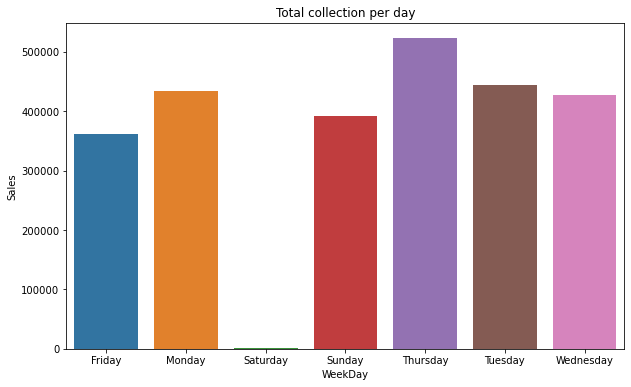

In [17]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Price',data=weekday_sales_df)
plt.xlabel('WeekDay')
plt.ylabel('Sales')
plt.title('Total collection per day')
plt.show()

In [18]:
weekly_sales_df = non_cancelled_Df.groupby(by='Weeknumber')['Price'].sum().reset_index()
weekly_sales_df 

,Weeknumber,Price
0,1,30831.040
1,2,32837.110
2,3,34973.381
3,4,50469.051
4,5,35249.802
5,6,28040.940
6,7,35785.022
7,8,38352.072
8,9,44695.540
9,10,37001.520


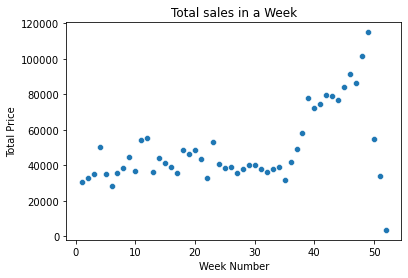

In [19]:
sns.scatterplot(x='Weeknumber',y='Price',data = weekly_sales_df)
plt.xlabel('Week Number')
plt.ylabel('Total Price')
plt.title('Total sales in a Week')
plt.show()

Finding the total number of orders placed in each week,day of the week and the month

In [20]:
month_orders = non_cancelled_Df.groupby(by='Month')['Invoice'].count().reset_index(name='Counts')
month_orders


,Month,Counts
0,1,43004
1,2,43294
2,3,59476
3,4,49877
4,5,56964
5,6,58373
6,7,53857
7,8,53399
8,9,74627
9,10,99115


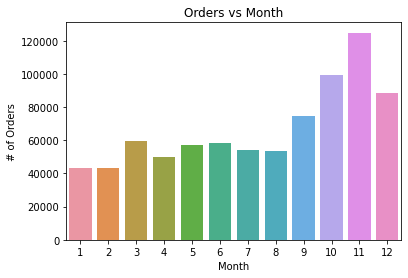

In [21]:
sns.barplot(x='Month',y='Counts',data=month_orders)
plt.xlabel('Month')
plt.ylabel('# of Orders')
plt.title('Orders vs Month')
plt.show()

In [22]:
weekday_orders = non_cancelled_Df.groupby(by='Day_of_week')['Invoice'].count().reset_index(name='Counts')
weekday_orders

,Day_of_week,Counts
0,Friday,105502
1,Monday,128359
2,Saturday,400
3,Sunday,136329
4,Thursday,161664
5,Tuesday,136794
6,Wednesday,136501


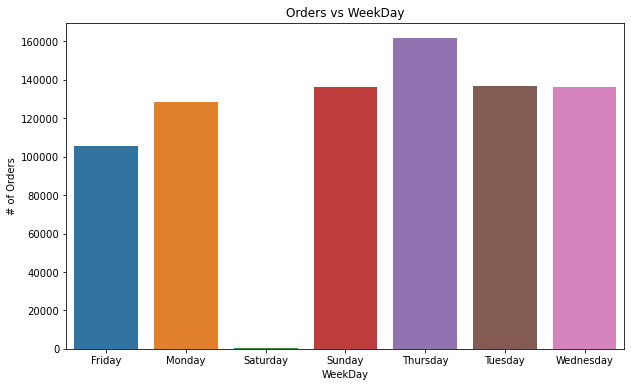

In [23]:
plt.subplots(figsize=(10, 6))
sns.barplot(x='Day_of_week',y='Counts',data=weekday_orders)
plt.xlabel('WeekDay')
plt.ylabel('# of Orders')
plt.title('Orders vs WeekDay')
plt.show()

In [24]:
df_or.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'Price',
       'Customer_Id', 'Country', 'Day_of_week', 'Date', 'Hour', 'Month',
       'Year', 'Day', 'Weeknumber'],
      dtype='object')

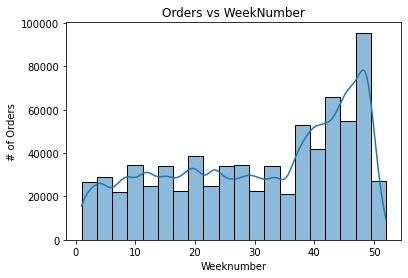

In [25]:
sns.histplot(x='Weeknumber',data=df_or,kde=True,bins=20)
plt.xlabel('Weeknumber')
plt.ylabel('# of Orders')
plt.title('Orders vs WeekNumber')
plt.show()

In [26]:
df_or.head()

,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Date,Hour,Month,Year,Day,Weeknumber
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,Tuesday,2009-12-01,7,12,2009,1,49


In [27]:
df_or.Date.max()

'2011-12-09'

In [28]:
sub_df = df_or.groupby(by=(['Month','Hour'])).size().reset_index(name='counts')
sub_df.shape

(169, 3)

In [29]:
sub_df.head()

jan_Df = sub_df[sub_df.Month == 1]
feb_Df = sub_df[sub_df.Month == 2]
march_Df = sub_df[sub_df.Month == 3]
april_Df = sub_df[sub_df.Month == 4]
may_Df = sub_df[sub_df.Month == 5]
june_Df = sub_df[sub_df.Month == 6]
july_Df = sub_df[sub_df.Month == 7]
aug_Df = sub_df[sub_df.Month == 8]
sep_Df = sub_df[sub_df.Month == 9]
oct_Df = sub_df[sub_df.Month == 1]
nov_Df = sub_df[sub_df.Month == 11]
dec_Df = sub_df[sub_df.Month == 12]



Text(0.5, 1.0, 'December Sales')

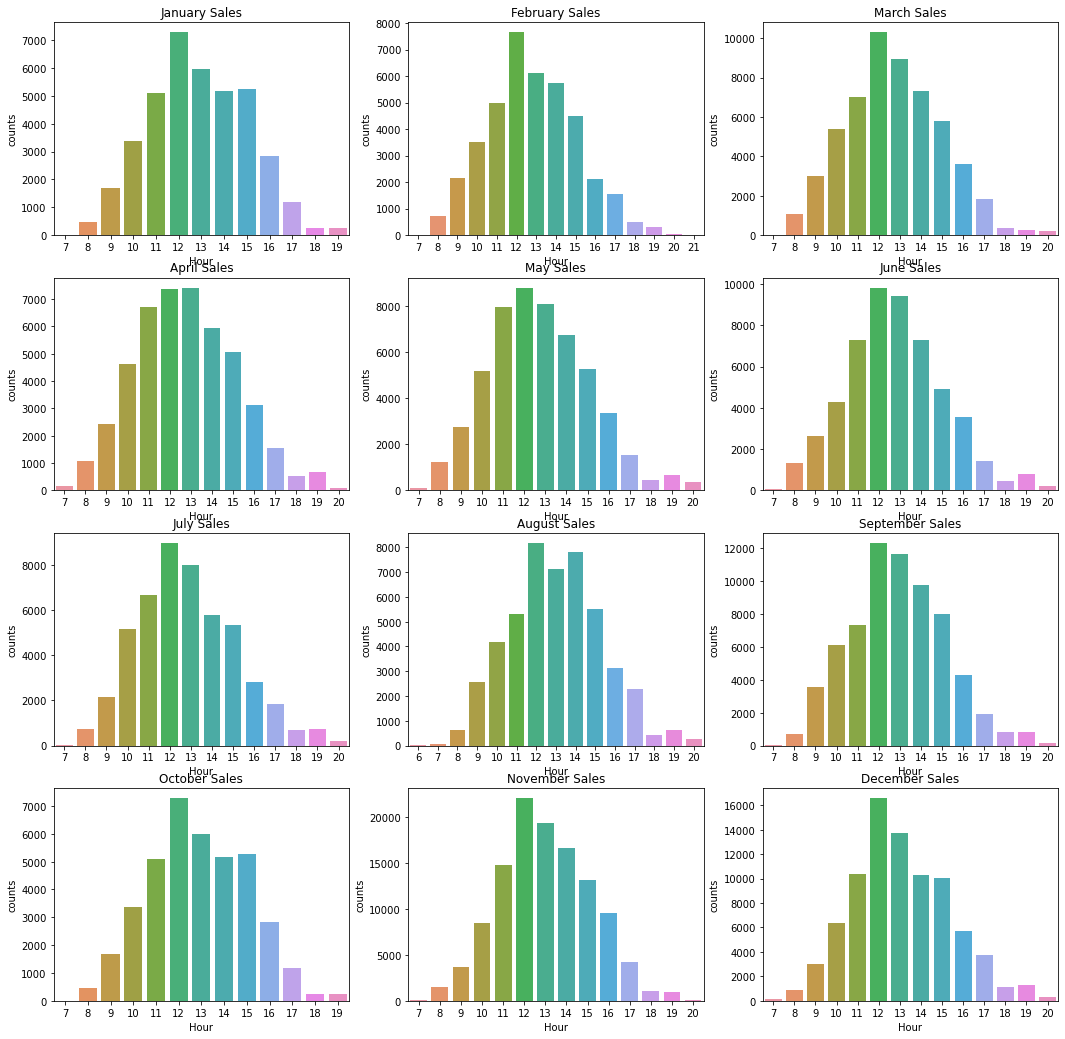

In [30]:
fig, axes = plt.subplots(4, 3,figsize =(18,18))
sns.barplot(ax=axes[0,0],data= jan_Df,x='Hour',y='counts')
axes[0,0].set_title('January Sales')
sns.barplot(ax=axes[0,1],data= feb_Df,x='Hour',y='counts')
axes[0,1].set_title('February Sales')
sns.barplot(ax=axes[0,2],data= march_Df,x='Hour',y='counts')
axes[0,2].set_title('March Sales')
sns.barplot(ax=axes[1,0],data= april_Df,x='Hour',y='counts')
axes[1,0].set_title('April Sales')
sns.barplot(ax=axes[1,1],data= may_Df,x='Hour',y='counts')
axes[1,1].set_title('May Sales')
sns.barplot(ax=axes[1,2],data= june_Df,x='Hour',y='counts')
axes[1,2].set_title('June Sales')
sns.barplot(ax=axes[2,0],data= july_Df,x='Hour',y='counts')
axes[2,0].set_title('July Sales')
sns.barplot(ax=axes[2,1],data= aug_Df,x='Hour',y='counts')
axes[2,1].set_title('August Sales')
sns.barplot(ax=axes[2,2],data= sep_Df,x='Hour',y='counts')
axes[2,2].set_title('September Sales')
sns.barplot(ax=axes[3,0],data= oct_Df,x='Hour',y='counts')
axes[3,0].set_title('October Sales')
sns.barplot(ax=axes[3,1],data= nov_Df,x='Hour',y='counts')
axes[3,1].set_title('November Sales')
sns.barplot(ax=axes[3,2],data= dec_Df,x='Hour',y='counts')
axes[3,2].set_title('December Sales')

In [31]:
from scipy.stats import ttest_ind

In [32]:
t, p = ttest_ind(jan_Df['counts'], feb_Df['counts'], equal_var=False)
print("Jan Feb ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(feb_Df['counts'], march_Df['counts'], equal_var=False)
print("Feb March ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(march_Df['counts'], april_Df['counts'], equal_var=False)
print("March April ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(april_Df['counts'], may_Df['counts'], equal_var=False)
print("April May ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(may_Df['counts'], june_Df['counts'], equal_var=False)
print("May June ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(june_Df['counts'], july_Df['counts'], equal_var=False)
print("June July ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(july_Df['counts'], aug_Df['counts'], equal_var=False)
print("July Aug ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(aug_Df['counts'], sep_Df['counts'], equal_var=False)
print("Aug Sep ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(sep_Df['counts'], oct_Df['counts'], equal_var=False)
print("Sep Oct ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(oct_Df['counts'], nov_Df['counts'], equal_var=False)
print("Oct Nov ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(nov_Df['counts'], dec_Df['counts'], equal_var=False)
print("Nov Dec ttest_ind:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(dec_Df['counts'], jan_Df['counts'], equal_var=False)
print("Dec Jan ttest_ind:            t = %g  p = %g" % (t, p))

Jan Feb ttest_ind:            t = 0.339108  p = 0.737301
Feb March ttest_ind:            t = -1.10353  p = 0.28088
March April ttest_ind:            t = 0.495921  p = 0.624339
April May ttest_ind:            t = -0.360125  p = 0.721717
May June ttest_ind:            t = -0.05549  p = 0.956175
June July ttest_ind:            t = 0.239626  p = 0.812523
July Aug ttest_ind:            t = 0.272698  p = 0.787185
Aug Sep ttest_ind:            t = -1.14949  p = 0.262366
Sep Oct ttest_ind:            t = 1.34075  p = 0.194272
Oct Nov ttest_ind:            t = -2.42626  p = 0.0274752
Nov Dec ttest_ind:            t = 0.912827  p = 0.370699
Dec Jan ttest_ind:            t = 1.86354  p = 0.0781119


In [33]:
df_or['Date'] = pd.to_datetime(df_or['Date'], format='%Y-%m-%d')

In [34]:
print(df_or.Date.min())
print(df_or.Date.max())

2009-12-01 00:00:00
2011-12-09 00:00:00


In [35]:
new_Df = df_or.groupby(by=['Invoice','Date'])['Invoice'].nunique().reset_index(name='counts')
new_Df.head()

,Invoice,Date,counts
0,489434,2009-12-01,1
1,489435,2009-12-01,1
2,489436,2009-12-01,1
3,489437,2009-12-01,1
4,489438,2009-12-01,1


In [36]:
new_Df = new_Df[['Date','counts']]

In [37]:
orders_df = new_Df.groupby(by = 'Date')['counts'].sum().reset_index(name='counts')
orders_df.head()

,Date,counts
0,2009-12-01,125
1,2009-12-02,113
2,2009-12-03,131
3,2009-12-04,86
4,2009-12-05,29


In [38]:
orders_df['Date'] = pd.to_datetime(orders_df['Date'],format='%Y-%m-%d')
orders_df.dtypes

Date      datetime64[ns]
counts             int64
dtype: object

In [39]:
all_Days_df = pd.read_csv('..\data\interim\\all_days.csv')

In [40]:
all_Days_df['Date'] = pd.to_datetime(all_Days_df['Date'],format='%Y-%m-%d')
all_Days_df.head()

,Date
0,2009-12-01
1,2009-12-02
2,2009-12-03
3,2009-12-04
4,2009-12-05


In [41]:
all_Days_df.dtypes

Date    datetime64[ns]
dtype: object

In [42]:
merged_Df = pd.merge(all_Days_df,orders_df,how="left",on="Date")
merged_Df.head()

,Date,counts
0,2009-12-01,125.0
1,2009-12-02,113.0
2,2009-12-03,131.0
3,2009-12-04,86.0
4,2009-12-05,29.0


In [43]:
merged_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 738
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    739 non-null    datetime64[ns]
 1   counts  604 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 KB


In [44]:
print("Average daily orders - {}".format(merged_Df['counts'].median()))

Average daily orders - 63.0


In [45]:
merged_Df['counts'] = merged_Df['counts'].fillna(merged_Df['counts'].median())

In [46]:
merged_Df.isna().sum()

Date      0
counts    0
dtype: int64

In [47]:
merged_Df[merged_Df['Date'] == '2009-12-25']

,Date,counts
24,2009-12-25,63.0


In [48]:
holiday_list = ['2009-12-25','2009-12-28','2010-01-01','2010-04-02','2010-04-05','2010-05-03','2010-05-31','2010-12-27','2010-12-28','2011-01-03','2011-04-22','2011-04-25','2011-05-02','2011-05-30']

In [49]:
#Adding holiday list
for i in holiday_list:
    merged_Df.loc[merged_Df.Date == i,'is_holiday'] = 1

In [50]:
# Week before the holiday
date_range = (merged_Df['Date'] >= '2009-12-18') & (merged_Df['Date'] <= '2009-12-24')
    
pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
print(pre_total_sales)


309.0


In [51]:
#before holiday 
pre_dict = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(7, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))
    
    pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Pre Total orders for holiday list - {} is {}".format(i, pre_total_sales))
    pre_dict[i]=pre_total_sales

pre_sales_df = pd.DataFrame(pre_dict.items(), columns=['Date', 'Pre_orders'])


Pre Total orders for holiday list - 2009-12-25 is 309.0
Pre Total orders for holiday list - 2009-12-28 is 343.0
Pre Total orders for holiday list - 2010-01-01 is 441.0
Pre Total orders for holiday list - 2010-04-02 is 489.0
Pre Total orders for holiday list - 2010-04-05 is 495.0
Pre Total orders for holiday list - 2010-05-03 is 480.0
Pre Total orders for holiday list - 2010-05-31 is 481.0
Pre Total orders for holiday list - 2010-12-27 is 327.0
Pre Total orders for holiday list - 2010-12-28 is 321.0
Pre Total orders for holiday list - 2011-01-03 is 441.0
Pre Total orders for holiday list - 2011-04-22 is 427.0
Pre Total orders for holiday list - 2011-04-25 is 475.0
Pre Total orders for holiday list - 2011-05-02 is 404.0
Pre Total orders for holiday list - 2011-05-30 is 437.0


In [52]:
#After holiday
post_hol_sales = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) + pd.to_timedelta(1, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) + pd.to_timedelta(7, unit='d')))
    
    post_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Post Total orders for holiday list - {} is {}".format(i, post_sales))
    post_hol_sales[i]=post_sales

post_sales_df = pd.DataFrame(post_hol_sales.items(), columns=['Date', 'Post_orders'])


Post Total orders for holiday list - 2009-12-25 is 441.0
Post Total orders for holiday list - 2009-12-28 is 414.0
Post Total orders for holiday list - 2010-01-01 is 320.0
Post Total orders for holiday list - 2010-04-02 is 418.0
Post Total orders for holiday list - 2010-04-05 is 405.0
Post Total orders for holiday list - 2010-05-03 is 530.0
Post Total orders for holiday list - 2010-05-31 is 438.0
Post Total orders for holiday list - 2010-12-27 is 441.0
Post Total orders for holiday list - 2010-12-28 is 418.0
Post Total orders for holiday list - 2011-01-03 is 341.0
Post Total orders for holiday list - 2011-04-22 is 447.0
Post Total orders for holiday list - 2011-04-25 is 404.0
Post Total orders for holiday list - 2011-05-02 is 492.0
Post Total orders for holiday list - 2011-05-30 is 391.0


In [53]:
#before holiday 
pre_dict = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(30, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))
    
    pre_total_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Pre Total orders for holiday list - {} is {}".format(i, pre_total_sales))
    pre_dict[i]=pre_total_sales

pre_30_sales_df = pd.DataFrame(pre_dict.items(), columns=['Date', 'Pre_orders'])

#After holiday
post_hol_sales = {}
for i in holiday_list:
    date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) + pd.to_timedelta(1, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) + pd.to_timedelta(30, unit='d')))
    
    post_sales = merged_Df.loc[date_range]['counts'].sum()
    print("Post Total orders for holiday list - {} is {}".format(i, post_sales))
    post_hol_sales[i]=post_sales

post_30_sales_df = pd.DataFrame(post_hol_sales.items(), columns=['Date', 'Post_orders'])



Pre Total orders for holiday list - 2009-12-25 is 1962.0
Pre Total orders for holiday list - 2009-12-28 is 2151.0
Pre Total orders for holiday list - 2010-01-01 is 2278.0
Pre Total orders for holiday list - 2010-04-02 is 1923.0
Pre Total orders for holiday list - 2010-04-05 is 1917.0
Pre Total orders for holiday list - 2010-05-03 is 1887.0
Pre Total orders for holiday list - 2010-05-31 is 2006.0
Pre Total orders for holiday list - 2010-12-27 is 2353.0
Pre Total orders for holiday list - 2010-12-28 is 2353.0
Pre Total orders for holiday list - 2011-01-03 is 2065.0
Pre Total orders for holiday list - 2011-04-22 is 1793.0
Pre Total orders for holiday list - 2011-04-25 is 1809.0
Pre Total orders for holiday list - 2011-05-02 is 1779.0
Pre Total orders for holiday list - 2011-05-30 is 1995.0
Post Total orders for holiday list - 2009-12-25 is 1534.0
Post Total orders for holiday list - 2009-12-28 is 1537.0
Post Total orders for holiday list - 2010-01-01 is 1525.0
Post Total orders for holida

In [54]:
pre_post_sales_df = pd.merge(pre_sales_df,post_sales_df,how='inner',on='Date')
pre_post_sales_df


,Date,Pre_orders,Post_orders
0,2009-12-25,309.0,441.0
1,2009-12-28,343.0,414.0
2,2010-01-01,441.0,320.0
3,2010-04-02,489.0,418.0
4,2010-04-05,495.0,405.0
5,2010-05-03,480.0,530.0
6,2010-05-31,481.0,438.0
7,2010-12-27,327.0,441.0
8,2010-12-28,321.0,418.0
9,2011-01-03,441.0,341.0


In [55]:
merged_Df['is_holiday'] = merged_Df['is_holiday'].fillna(0)

In [56]:
all_Days_lst = all_Days_df['Date'].tolist()

for i in all_Days_lst:
     if pd.to_datetime(i) > pd.to_datetime('2009-12-07'):
         date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(7, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))         
         valuessss = merged_Df.loc[date_range]['counts'].sum()
         merged_Df.loc[merged_Df.Date == i,'Pre_wk_orders'] = valuessss


In [57]:
for i in all_Days_lst:
     if pd.to_datetime(i) > pd.to_datetime('2009-12-30'):
         date_range = (merged_Df['Date'] >=  (pd.to_datetime(i) - pd.to_timedelta(30, unit='d'))) & (merged_Df['Date'] <= (pd.to_datetime(i) - pd.to_timedelta(1, unit='d')))         
         valuessss = merged_Df.loc[date_range]['counts'].sum()
         merged_Df.loc[merged_Df.Date == i,'Pre_30_orders'] = valuessss

In [58]:
merged_Df[merged_Df['Pre_wk_orders'] > 0]

,Date,counts,is_holiday,Pre_wk_orders,Pre_30_orders
7,2009-12-08,145.0,0.0,665.0,NaN
8,2009-12-09,81.0,0.0,685.0,NaN
9,2009-12-10,108.0,0.0,653.0,NaN
10,2009-12-11,109.0,0.0,630.0,NaN
11,2009-12-12,63.0,0.0,653.0,NaN
...,...,...,...,...,...
734,2011-12-05,116.0,0.0,741.0,3001.0
735,2011-12-06,128.0,0.0,743.0,3054.0
736,2011-12-07,100.0,0.0,745.0,3087.0
737,2011-12-08,124.0,0.0,731.0,3094.0


In [59]:
for i in holiday_list:
    if pd.to_datetime(i).month == 4 or pd.to_datetime(i).month == 5:
        merged_Df.loc[merged_Df.Date == i,'Sales_boost'] = 1

merged_Df[merged_Df.Sales_boost == 1]
merged_Df['Sales_boost'] = merged_Df['Sales_boost'].fillna(0)

In [60]:
merged_Df.head()

,Date,counts,is_holiday,Pre_wk_orders,Pre_30_orders,Sales_boost
0,2009-12-01,125.0,0.0,NaN,NaN,0.0
1,2009-12-02,113.0,0.0,NaN,NaN,0.0
2,2009-12-03,131.0,0.0,NaN,NaN,0.0
3,2009-12-04,86.0,0.0,NaN,NaN,0.0
4,2009-12-05,29.0,0.0,NaN,NaN,0.0


In [61]:
merged_Df['Pre_wk_orders'] = merged_Df['Pre_wk_orders'].fillna(0)
merged_Df['Pre_30_orders'] = merged_Df['Pre_30_orders'].fillna(0)


In [62]:
final_df = pd.merge(merged_Df,df_or,how='left',on = 'Date')
final_df.head()

,Date,counts,is_holiday,Pre_wk_orders,Pre_30_orders,Sales_boost,Invoice,StockCode,Description,Quantity,Price,Customer_Id,Country,Day_of_week,Hour,Month,Year,Day,Weeknumber
0,2009-12-01,125.0,0.0,0.0,0.0,0.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,6.95,13085.0,United Kingdom,Tuesday,7.0,12.0,2009.0,1.0,49.0
1,2009-12-01,125.0,0.0,0.0,0.0,0.0,489434,79323P,PINK CHERRY LIGHTS,12.0,6.75,13085.0,United Kingdom,Tuesday,7.0,12.0,2009.0,1.0,49.0
2,2009-12-01,125.0,0.0,0.0,0.0,0.0,489434,79323W,WHITE CHERRY LIGHTS,12.0,6.75,13085.0,United Kingdom,Tuesday,7.0,12.0,2009.0,1.0,49.0
3,2009-12-01,125.0,0.0,0.0,0.0,0.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2.10,13085.0,United Kingdom,Tuesday,7.0,12.0,2009.0,1.0,49.0
4,2009-12-01,125.0,0.0,0.0,0.0,0.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,1.25,13085.0,United Kingdom,Tuesday,7.0,12.0,2009.0,1.0,49.0


In [88]:
final_trim_df = final_df[['counts','is_holiday','Pre_wk_orders','Pre_30_orders','Sales_boost','Invoice','StockCode','Quantity','Price','Customer_Id','Hour','Month','Year','Day','Weeknumber']]

In [89]:
final_trim_df.isna().sum()

counts             0
is_holiday         0
Pre_wk_orders      0
Pre_30_orders      0
Sales_boost        0
Invoice          135
StockCode        135
Quantity         135
Price            135
Customer_Id      135
Hour             135
Month            135
Year             135
Day              135
Weeknumber       135
dtype: int64

In [90]:
final_trim_df = final_trim_df[~(final_trim_df['Customer_Id'].isna())]
final_trim_df.isna().sum()

counts           0
is_holiday       0
Pre_wk_orders    0
Pre_30_orders    0
Sales_boost      0
Invoice          0
StockCode        0
Quantity         0
Price            0
Customer_Id      0
Hour             0
Month            0
Year             0
Day              0
Weeknumber       0
dtype: int64

In [91]:
final_trim_df.dtypes

counts           float64
is_holiday       float64
Pre_wk_orders    float64
Pre_30_orders    float64
Sales_boost      float64
Invoice           object
StockCode         object
Quantity         float64
Price            float64
Customer_Id      float64
Hour             float64
Month            float64
Year             float64
Day              float64
Weeknumber       float64
dtype: object

<AxesSubplot:xlabel='x', ylabel='y'>

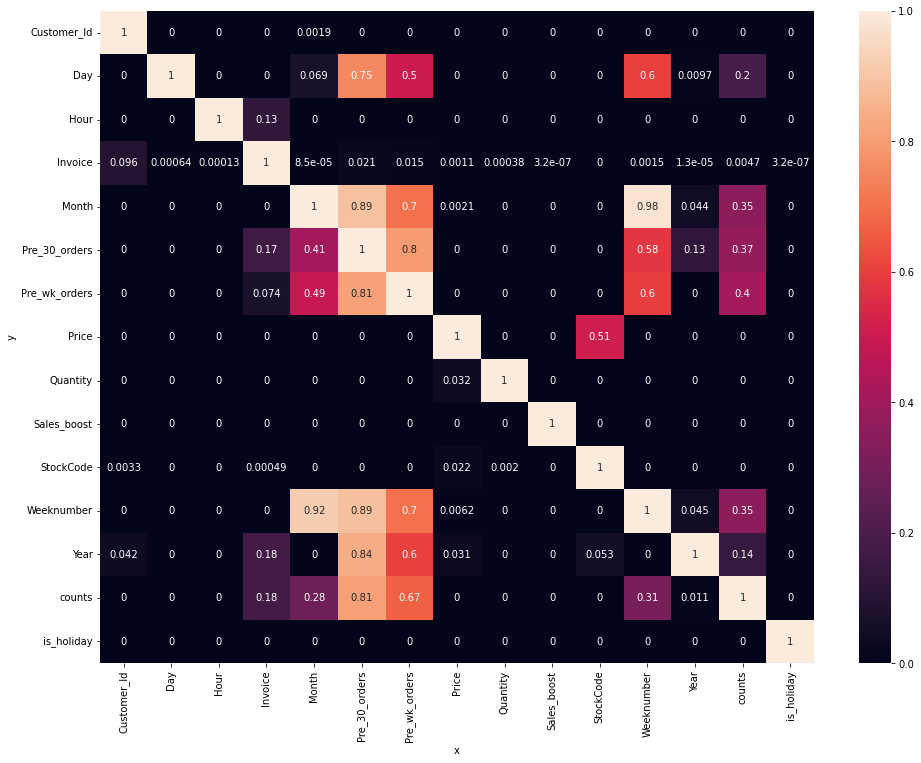

In [95]:
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")
matrix_df = pps.matrix(final_trim_df).pivot(columns='x', index='y',  values='ppscore')
plt.figure(figsize=(16,12))
sns.heatmap(matrix_df, annot=True)

<AxesSubplot:>

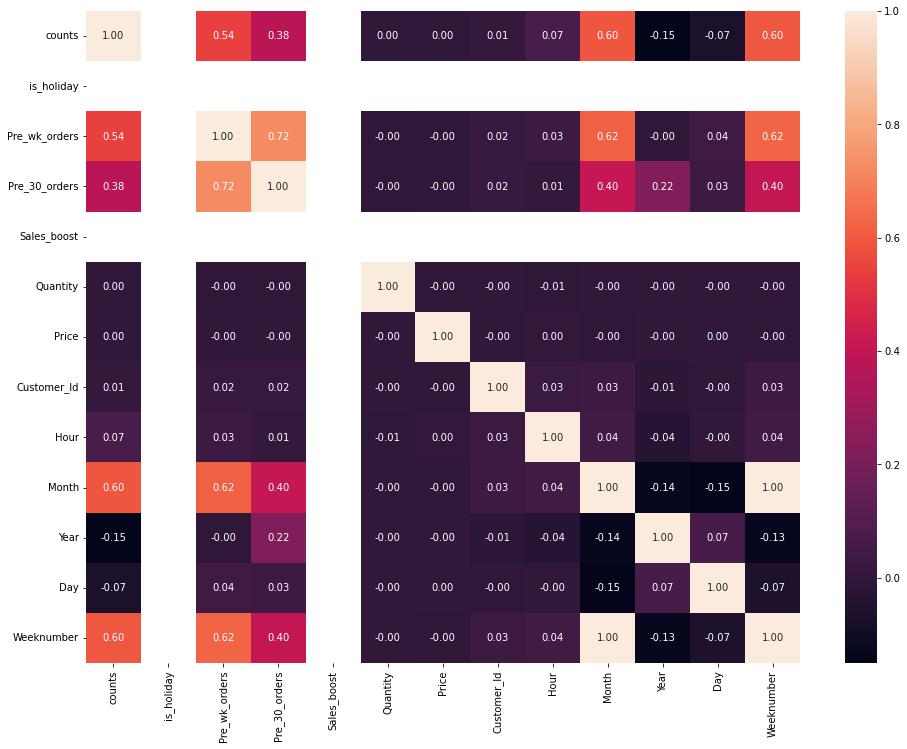

In [96]:
plt.figure(figsize=(16,12))
sns.heatmap(final_trim_df.corr(),annot=True,fmt=".2f")